In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_excel = "sales_data.xlsx"

sales_df = pd.read_excel(data_excel,sheet_name="Sales")
Customer_df = pd.read_excel(data_excel,sheet_name="Customers")
Product_df = pd.read_excel(data_excel,sheet_name="Products")

print("Sales Data")
print(sales_df.head())
print("\nCustomer Data")
print(Customer_df.head())
print("\nProduct Data")
print(Product_df.head())

Sales Data
   OrderID  CustomerID     Product  Quantity    Price  OrderDate Region  \
0        1         413    Keyboard         5  1815.96 2023-01-01  South   
1        2         500  Smartphone         6  1497.86 2023-01-02  South   
2        3         925  Smartphone         1   465.75 2023-01-03  North   
3        4          55     Monitor         3  1896.86 2023-01-04   East   
4        5         502  Smartphone         5  1725.11 2023-01-05  South   

   TotalRevenue  
0       9079.80  
1       8987.16  
2        465.75  
3       5690.58  
4       8625.55  

Customer Data
   CustomerID CustomerName Region
0           1   Customer_1   West
1           2   Customer_2  South
2           3   Customer_3   West
3           4   Customer_4   East
4           5   Customer_5   West

Product Data
      Product  Price
0      Laptop   1500
1      Tablet    500
2  Smartphone   1200
3     Monitor    300
4    Keyboard     50


In [3]:
sales_df.isnull().sum()

OrderID         0
CustomerID      0
Product         0
Quantity        0
Price           0
OrderDate       0
Region          0
TotalRevenue    0
dtype: int64

In [4]:
sales_df.dropna(inplace=True)
sales_df["Quantity"].fillna(0,inplace=True)
sales_df["OrderDate"] = pd.to_datetime(sales_df["OrderDate"])

C:\Users\ninad\AppData\Local\Temp\ipykernel_19408\259148693.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df["Quantity"].fillna(0,inplace=True)


In [5]:
sales_df = pd.merge(sales_df,Customer_df,on="CustomerID",how="left")

In [6]:
sales_df.head()

,OrderID,CustomerID,Product,Quantity,Price,OrderDate,Region_x,TotalRevenue,CustomerName,Region_y
0,1,413,Keyboard,5,1815.96,2023-01-01,South,9079.80,Customer_413,South
1,2,500,Smartphone,6,1497.86,2023-01-02,South,8987.16,Customer_500,North
2,3,925,Smartphone,1,465.75,2023-01-03,North,465.75,Customer_925,South
3,4,55,Monitor,3,1896.86,2023-01-04,East,5690.58,Customer_55,South
4,5,502,Smartphone,5,1725.11,2023-01-05,South,8625.55,Customer_502,West


In [7]:
sales_df = pd.merge(sales_df,Product_df,on="Product",how="left")

In [8]:
sales_df.head()

,OrderID,CustomerID,Product,Quantity,Price_x,OrderDate,Region_x,TotalRevenue,CustomerName,Region_y,Price_y
0,1,413,Keyboard,5,1815.96,2023-01-01,South,9079.80,Customer_413,South,50
1,2,500,Smartphone,6,1497.86,2023-01-02,South,8987.16,Customer_500,North,1200
2,3,925,Smartphone,1,465.75,2023-01-03,North,465.75,Customer_925,South,1200
3,4,55,Monitor,3,1896.86,2023-01-04,East,5690.58,Customer_55,South,300
4,5,502,Smartphone,5,1725.11,2023-01-05,South,8625.55,Customer_502,West,1200


In [9]:
sales_df["TotalRevenue"] = sales_df["Quantity"] * sales_df["Price_y"]

In [10]:
display(sales_df.head())

,OrderID,CustomerID,Product,Quantity,Price_x,OrderDate,Region_x,TotalRevenue,CustomerName,Region_y,Price_y
0,1,413,Keyboard,5,1815.96,2023-01-01,South,250,Customer_413,South,50
1,2,500,Smartphone,6,1497.86,2023-01-02,South,7200,Customer_500,North,1200
2,3,925,Smartphone,1,465.75,2023-01-03,North,1200,Customer_925,South,1200
3,4,55,Monitor,3,1896.86,2023-01-04,East,900,Customer_55,South,300
4,5,502,Smartphone,5,1725.11,2023-01-05,South,6000,Customer_502,West,1200


In [11]:
# PIVOT TABLE
pivot_table = pd.pivot_table(
    sales_df,
    values="TotalRevenue",
    index="Region_y",
    columns="Product",
    aggfunc="sum",
    fill_value=0
    
)
print(pivot_table)

Product   Keyboard   Laptop  Monitor  Smartphone   Tablet
Region_y                                                 
East        134350  3720000   729900     2844000  1281500
North       121550  3567000   738000     3246000  1346000
South       116150  3415500   710700     2946000  1164500
West        129700  3732000   803100     3068400  1376500


In [12]:
sales_df.shape

(10000, 11)

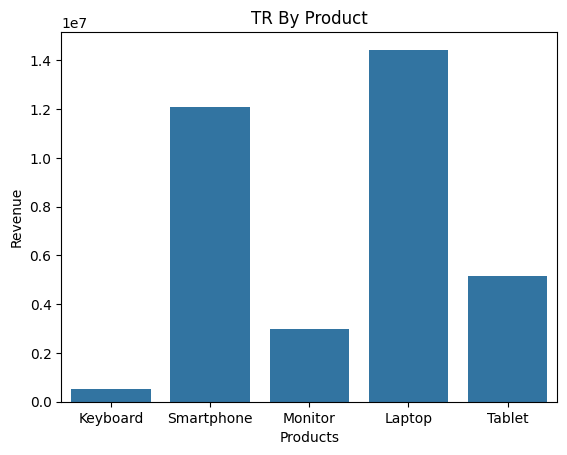

In [13]:
#Bar Plot Using SUMIF
plt.plot(figsize=(10,6))
sns.barplot(data= sales_df,x="Product",y="TotalRevenue",estimator=sum,errorbar=None)
plt.title("TR By Product")
plt.xlabel("Products")
plt.ylabel("Revenue")
plt.show()

<Axes: xlabel='Month', ylabel='TotalRevenue'>

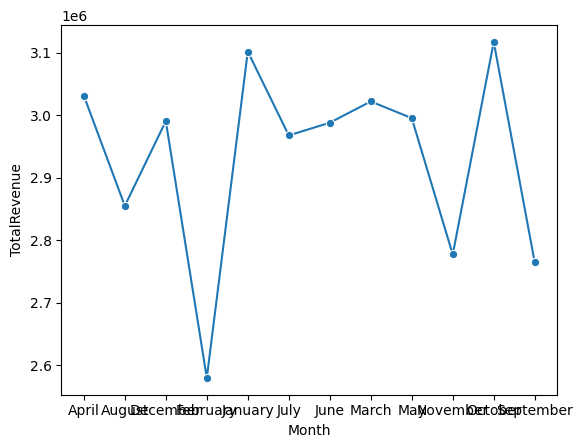

In [14]:
# LINE PLOT
sales_df["Month"]= sales_df["OrderDate"].dt.month_name()
Monthly_sales = sales_df.groupby("Month")["TotalRevenue"].sum().reset_index()

plt.plot(figsize=(16,8))
sns.lineplot(data=Monthly_sales,x="Month",y="TotalRevenue",marker='o')

In [15]:
with pd.ExcelWriter("Analysis.xlsx",engine='openpyxl') as writer:
    sales_df.to_excel(writer,sheet_name="Sales",index=False)
    pivot_table.to_excel(writer,sheet_name="Pivot")